In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("My Uber Drives - 2016 (1).csv")


**Questions**

Note: the system runs with Km not Miles.

  • For each purpose for each Category calculate the sum of kms driven

  • Describe the kms of all trips

  • Describe the speed of all trips

  • KMS been driven from Fort Pierce to Fort Pierce and how many trips

  • How many Trips in every start city and visualize the top 10

  • How many trips driven in all Months of year and visualize the top 4 month descening

  • How many trips driven in all days of week

  • How many KMS driven in all period of the day and visualiaze them descending
  


In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df["MILES*"] =round(df["MILES*"] * 1.609,2)


In [5]:

new_cols = []
for col in df.columns:
    clean_col = col.replace('*', '').capitalize()
    new_cols.append(clean_col)

df.columns = new_cols

df.head()

,Start_date,End_date,Category,Start,Stop,Miles,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,8.21,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,8.04,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,7.72,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,7.56,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,102.49,Customer Visit


In [6]:
df.rename(columns={'Miles' : 'KM'},inplace=True)

In [7]:
df.columns

Index(['Start_date', 'End_date', 'Category', 'Start', 'Stop', 'KM', 'Purpose'], dtype='object')

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates()

,Start_date,End_date,Category,Start,Stop,KM,Purpose
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,8.21,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,8.04,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,7.72,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,7.56,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,102.49,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Koamo,6.28,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Granta,Koamo,26.07,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,10.30,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,77.55,Temporary Site


In [10]:
df.isna().mean()*100

Start_date     0.000000
End_date       0.086505
Category       0.086505
Start          0.086505
Stop           0.086505
KM             0.000000
Purpose       43.512111
dtype: float64

In [11]:
df["Purpose"].nunique()

10

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start_date  1156 non-null   object 
 1   End_date    1155 non-null   object 
 2   Category    1155 non-null   object 
 3   Start       1155 non-null   object 
 4   Stop        1155 non-null   object 
 5   KM          1156 non-null   float64
 6   Purpose     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [13]:
df['Start_date'] = pd.to_datetime(df['Start_date'], errors='coerce')
df['End_date'] = pd.to_datetime(df['End_date'], errors='coerce')

df['Category'] = df['Category'].astype('category')
df['Purpose'] = df['Purpose'].astype('category')


df['Start'] = df['Start'].astype('string')
df['Stop'] = df['Stop'].astype('string')


In [14]:
df.head()

,Start_date,End_date,Category,Start,Stop,KM,Purpose
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,8.21,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,8.04,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,7.72,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,7.56,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,102.49,Customer Visit


In [15]:
for col in df.select_dtypes('category').columns :
    print (df[col].value_counts()) 
    print('**'*10)

Category
Business    1078
Personal      77
Name: count, dtype: int64
********************
Purpose
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64
********************


In [16]:
for col in df.select_dtypes('float64').columns :
    print (df[col].describe()) 
    print('**'*10)

count     1156.000000
mean        33.974827
std        578.112023
min          0.800000
25%          4.670000
50%          9.650000
75%         16.730000
max      19637.360000
Name: KM, dtype: float64
********************


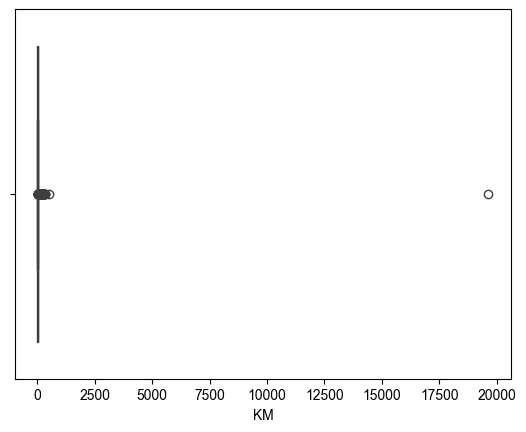

In [17]:
sns.boxplot(data=df,x='KM')
sns.set(rc={'figure.figsize':(8,8)})
plt.show()


In [18]:
value_to_drop = df.loc[df['KM']==df['KM'].max()].index
print(value_to_drop)
df = df.drop(value_to_drop)



Index([1155], dtype='int64')


<Axes: xlabel='KM'>

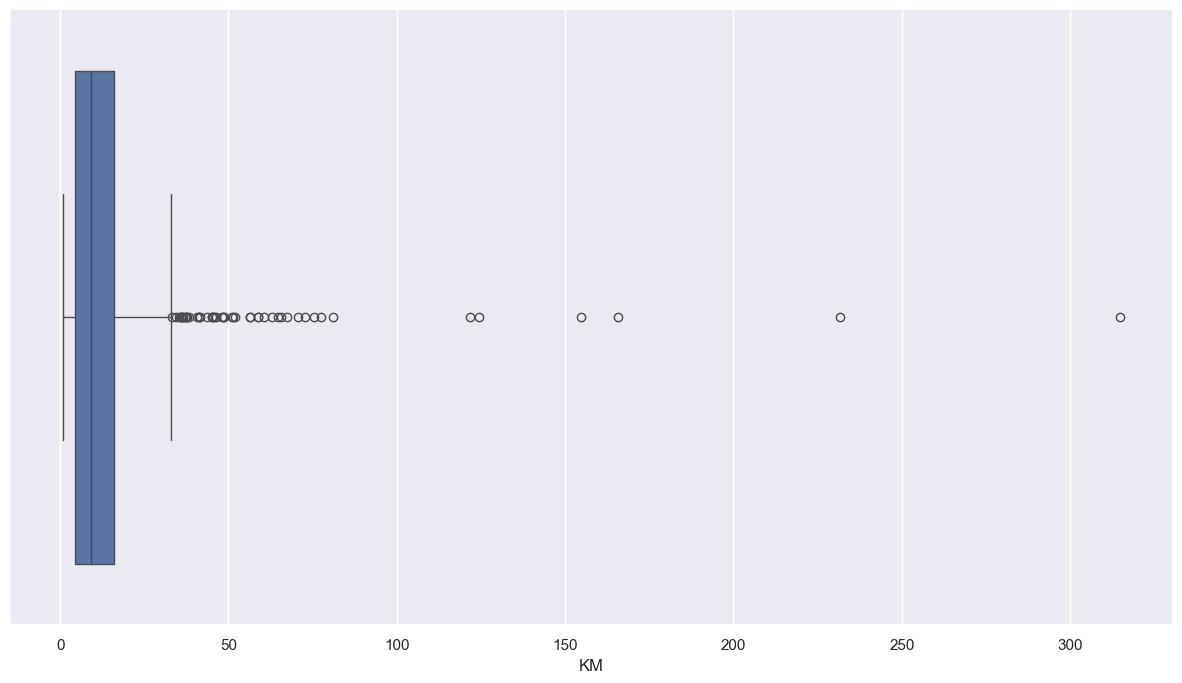

In [45]:
sns.set(rc={'figure.figsize' : (15,8)})
sns.boxplot(data=df,x='KM')

<span style="color:lightgreen">Q1:For each purpose for each Category calculate the sum of kms driven</span>


In [20]:
df.groupby(["Category","Purpose"])['KM'].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\2303071480.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["Category","Purpose"])['KM'].sum()


Category  Purpose        
Business  Airport/Travel       26.55
          Between Offices     316.97
          Charity ($)           0.00
          Commute               0.00
          Customer Visit     3362.01
          Errand/Supplies     817.42
          Meal/Entertain     1466.95
          Meeting            4587.75
          Moving                0.00
          Temporary Site      842.61
Personal  Airport/Travel        0.00
          Between Offices       0.00
          Charity ($)          24.30
          Commute             289.94
          Customer Visit        0.00
          Errand/Supplies       0.00
          Meal/Entertain        0.00
          Meeting               0.00
          Moving               29.28
          Temporary Site        0.00
Name: KM, dtype: float64

In [21]:
df.pivot_table(index='Purpose',columns='Category',values='KM',aggfunc=sum)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\3935229182.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='Purpose',columns='Category',values='KM',aggfunc=sum)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\3935229182.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table(index='Purpose',columns='Category',values='KM',aggfunc=sum)


Category,Business,Personal
Purpose,,
Airport/Travel,26.55,0.00
Between Offices,316.97,0.00
Charity ($),0.00,24.30
Commute,0.00,289.94
Customer Visit,3362.01,0.00
Errand/Supplies,817.42,0.00
Meal/Entertain,1466.95,0.00
Meeting,4587.75,0.00
Moving,0.00,29.28


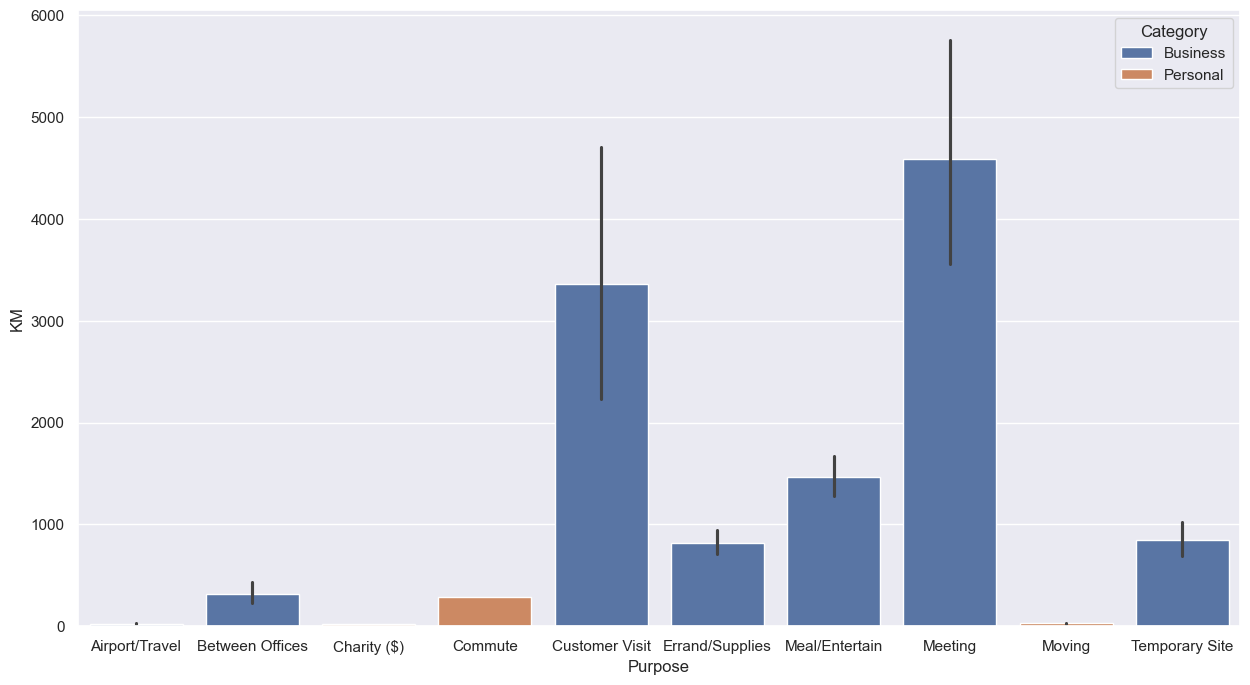

In [22]:
sns.barplot(data=df,x="Purpose",y='KM',hue='Category',estimator=sum)
plt.show()

Q2:<span style="color:lightgreen">Describe the kms of all trips</span>


In [23]:
df["KM"].describe()

count    1155.000000
mean       17.002199
std        34.720651
min         0.800000
25%         4.670000
50%         9.650000
75%        16.730000
max       499.270000
Name: KM, dtype: float64

Q3:<span style = "color :lightgreen">Describe the speed of all trips</span>


In [24]:
df["duration_in_minuts"] =  (df["End_date"] - df["Start_date"] )/np.timedelta64(1, 'm')
df[["duration_in_minuts"]]


,duration_in_minuts
0,6.0
1,12.0
2,13.0
3,14.0
4,67.0
...,...
1150,7.0
1151,18.0
1152,35.0
1153,18.0


In [25]:
df["speed_KM/h"]=(df['KM']  / df["duration_in_minuts"] )* 60
df["speed_KM/h"] = round(df["speed_KM/h"],2)
df[["speed_KM/h"]]

,speed_KM/h
0,82.10
1,40.20
2,35.63
3,32.40
4,91.78
...,...
1150,9.69
1151,20.93
1152,44.69
1153,34.33


<Axes: xlabel='speed_KM/h'>

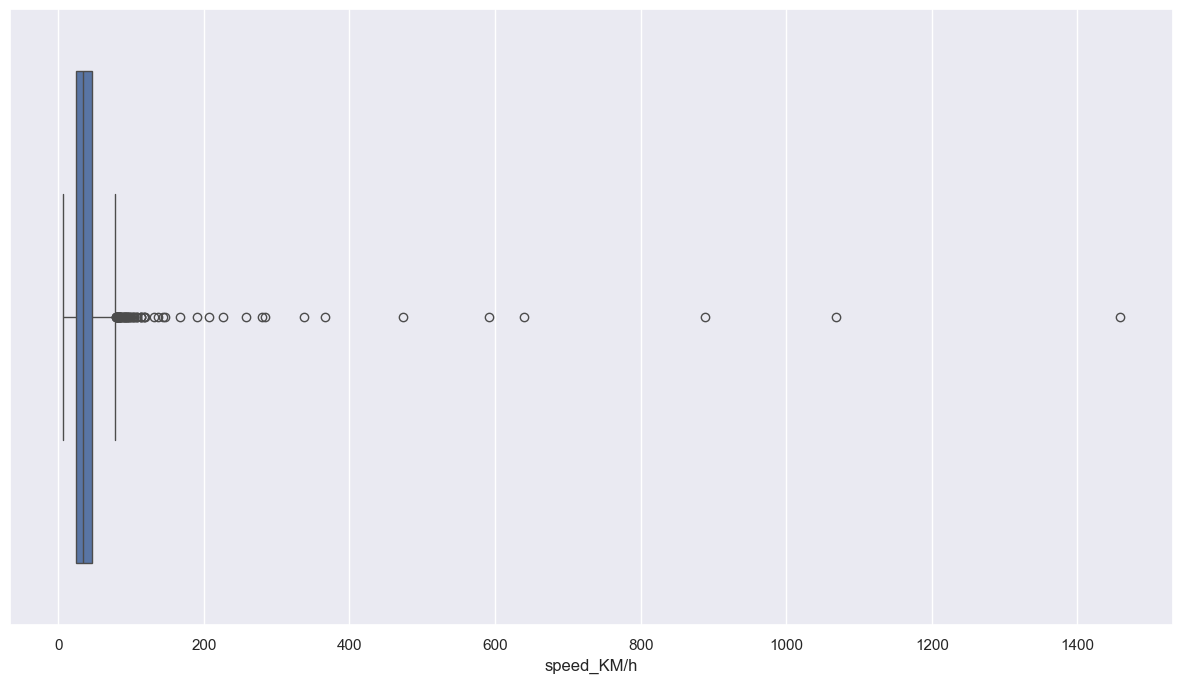

In [26]:
sns.boxplot(data=df , x="speed_KM/h")

<Axes: xlabel='speed_KM/h'>

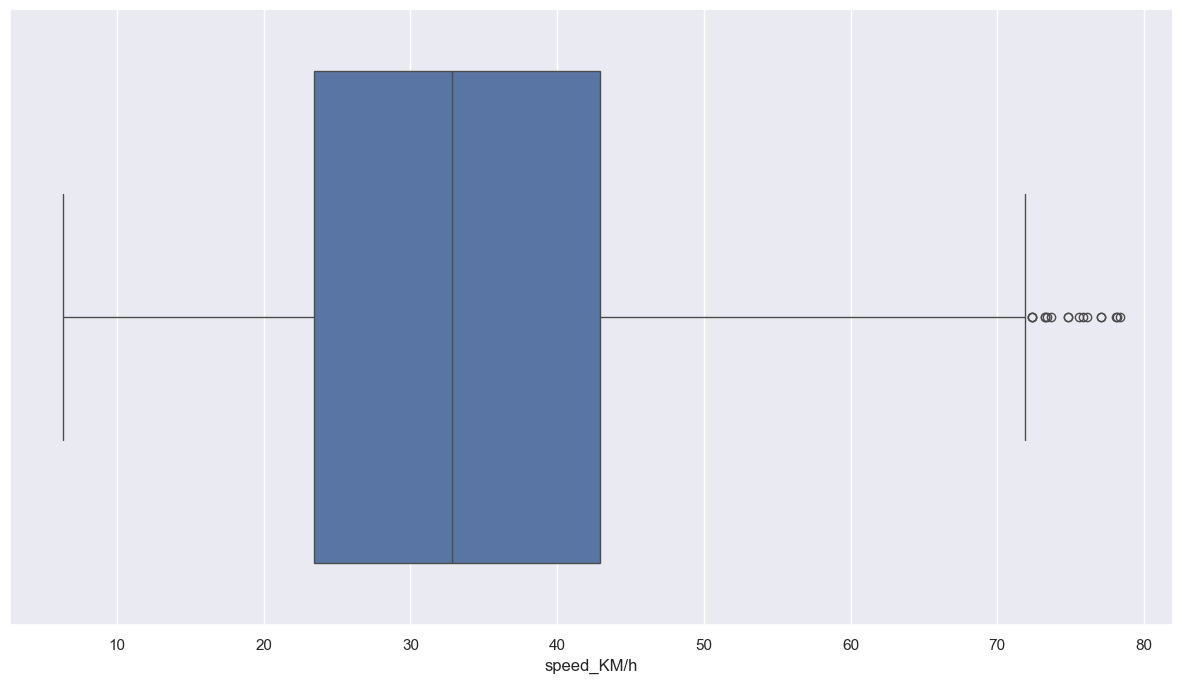

In [27]:
from methods import outlier_eliminator  #this a function i freequently  uses so i saved it in a file that has my usally used functions
df=outlier_eliminator(df,'speed_KM/h')
sns.boxplot(data=df , x="speed_KM/h")

In [28]:
df["speed_KM/h"].describe()

count    1082.000000
mean       34.184427
std        14.782648
min         6.300000
25%        23.442500
50%        32.825000
75%        42.900000
max        78.350000
Name: speed_KM/h, dtype: float64

Q4:<span style= 'color:green'> KMS been driven from Fort Pierce to Fort Pierce and how many trips </span>

In [29]:
Fort_Piercedf_table=df.loc[(df["Start"] == "Fort Pierce") & (df["Stop"] == "Fort Pierce"), "KM"]
Fort_Piercedf_table=pd.DataFrame(Fort_Piercedf_table)
print('number of trips of Fort Pierce : ',len(Fort_Piercedf_table))
print('number KM of trips of Fort Pierce : ',round(Fort_Piercedf_table['KM'].sum(),2))





number of trips of Fort Pierce :  3
number KM of trips of Fort Pierce :  23.32


Q5 <span style='color:green'> How many Trips in every start city and visualize the top 10</span>



In [30]:
df['Start'] = df['Start'].str.replace('?', '', regex=False)


In [31]:
top_10 = df['Start'].value_counts().head(10)
top_10

Start
Cary              198
Granta            131
Morrisville        81
Whitebridge        66
Islamabad          55
Durham             36
Lahore             35
Karchi             27
Raleigh            27
Westpark Place     17
Name: count, dtype: Int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\3910170132.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_10,palette='RdBu')


<Axes: xlabel='Start', ylabel='count'>

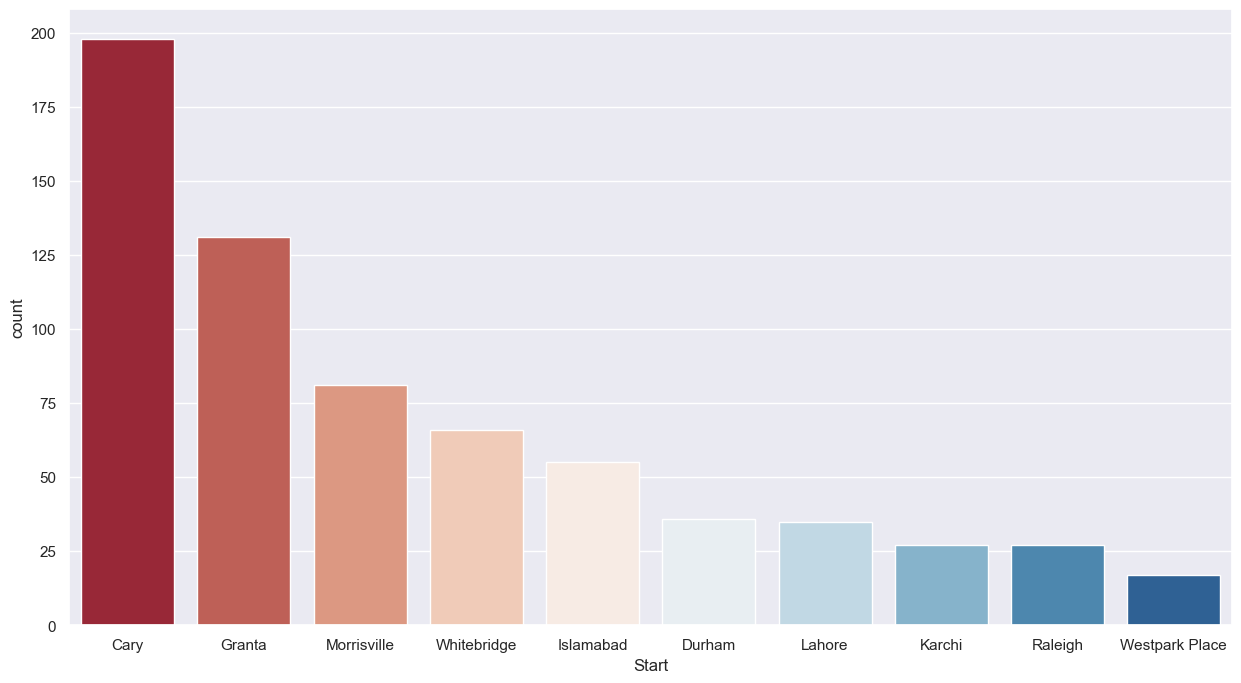

In [32]:
sns.barplot(top_10,palette='RdBu')

Q6:<span style = 'color : green'>How many trips driven in all Months of year and visualize the top 4 month descening</span>

In [33]:
df['Start_date'].astype

<bound method NDFrame.astype of 1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
7      2016-01-07 13:27:00
8      2016-01-10 08:05:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: Start_date, Length: 1082, dtype: datetime64[ns]>

In [34]:
df['month']=df['Start_date'].dt.month_name()
df['month'].value_counts().sort_values(ascending=False)


month
December     145
August       129
November     118
February     110
March        107
July         107
June         102
October       89
January       56
April         49
May           42
September     28
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\545797171.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_4_months , palette='RdBu')


<Axes: xlabel='month', ylabel='count'>

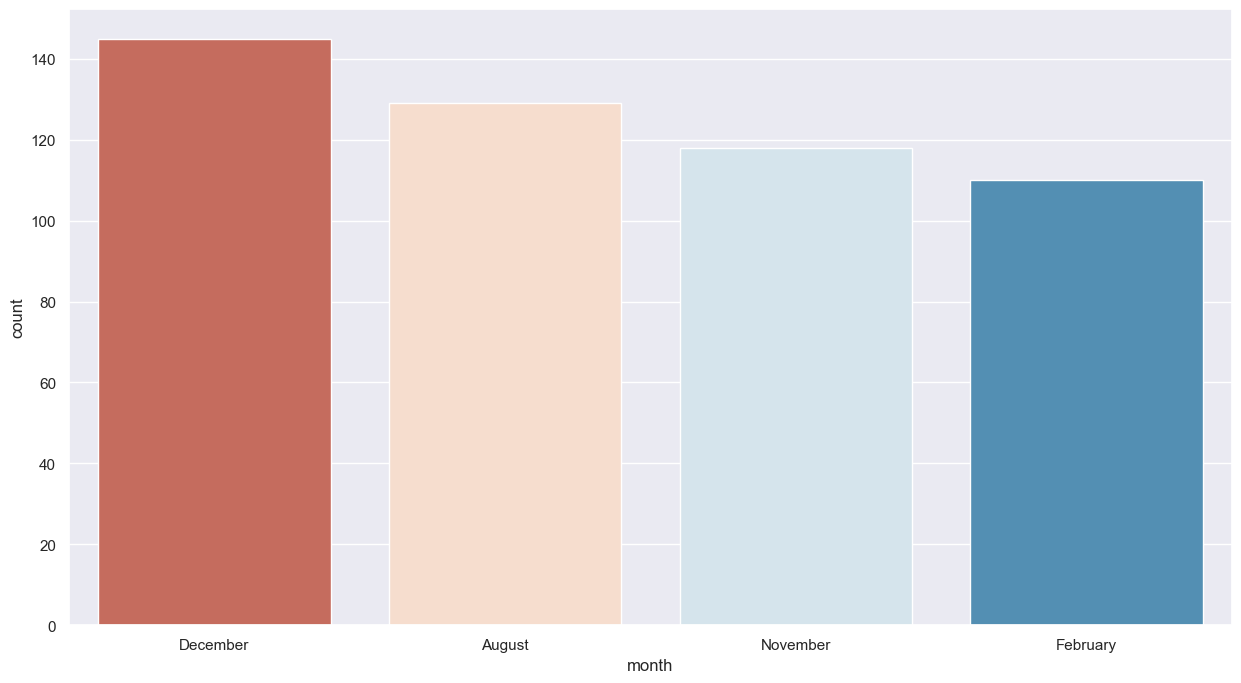

In [35]:
top_4_months = df['month'].value_counts().sort_values(ascending=False).head(4)
sns.barplot(top_4_months , palette='RdBu')

Q7 : <span style='color:green'>How many trips driven in all days of week</span>

In [36]:
df["day"]=df["Start_date"].dt.day_name()

In [37]:
df["day"].value_counts()


day
Friday       189
Tuesday      169
Monday       168
Saturday     140
Thursday     139
Wednesday    139
Sunday       138
Name: count, dtype: int64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\2728038864.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_days,palette='RdBu')


<Axes: xlabel='day', ylabel='count'>

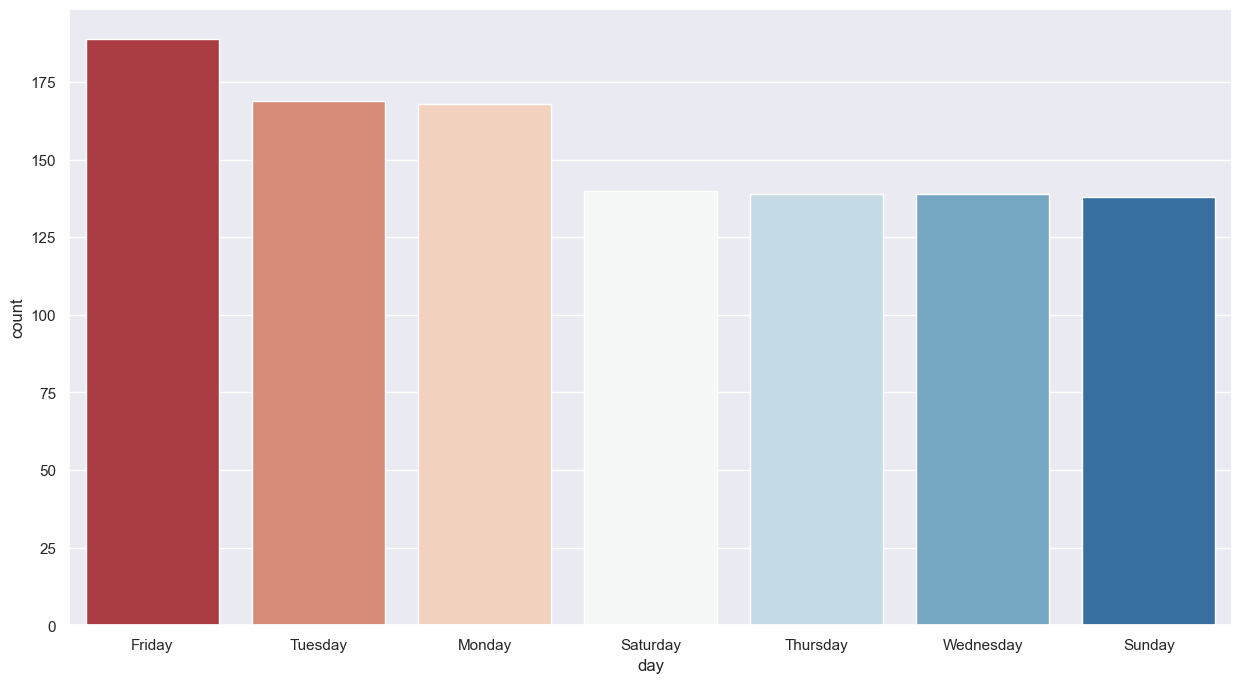

In [38]:
top_days = df["day"].value_counts().sort_values(ascending=False)
sns.barplot(top_days,palette='RdBu')

Q8:<span style='color : green'>How many KMS driven in all period of the day and visualiaze them descending</span>

In [39]:
df["hour"]=df["Start_date"].dt.hour

labels=['Morning','Afternoon','Night']
bins=[0,12,17,24]
df["period"]=pd.cut(df["hour"],labels=labels,bins=bins,right=False)

In [40]:
df["period"]

1         Morning
2           Night
3           Night
7       Afternoon
8         Morning
          ...    
1150      Morning
1151    Afternoon
1152    Afternoon
1153        Night
1154        Night
Name: period, Length: 1082, dtype: category
Categories (3, object): ['Morning' < 'Afternoon' < 'Night']

In [41]:
top_priods = df.groupby("period")["KM"].sum()
top_priods = top_priods.sort_values(ascending=False)


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\52532681.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_priods = df.groupby("period")["KM"].sum()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11796\858534853.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(top_priods,palette='RdBu')


<Axes: xlabel='period', ylabel='KM'>

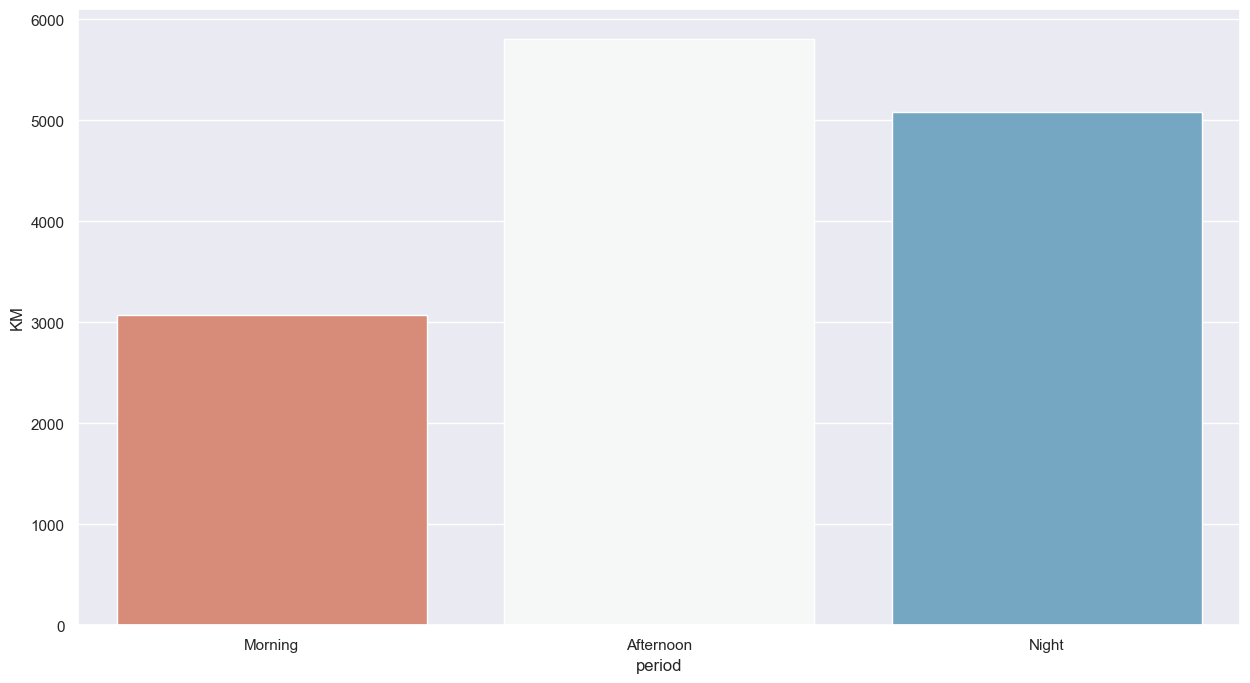

In [42]:
sns.barplot(top_priods,palette='RdBu')

In [43]:
df.head()

,Start_date,End_date,Category,Start,Stop,KM,Purpose,duration_in_minuts,speed_KM/h,month,day,hour,period
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,8.04,NaN,12.0,40.20,January,Saturday,1,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,7.72,Errand/Supplies,13.0,35.63,January,Saturday,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,7.56,Meeting,14.0,32.40,January,Tuesday,17,Night
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,1.29,Meeting,6.0,12.90,January,Thursday,13,Afternoon
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,13.35,Meeting,20.0,40.05,January,Sunday,8,Morning


<Axes: xlabel='day', ylabel='KM'>

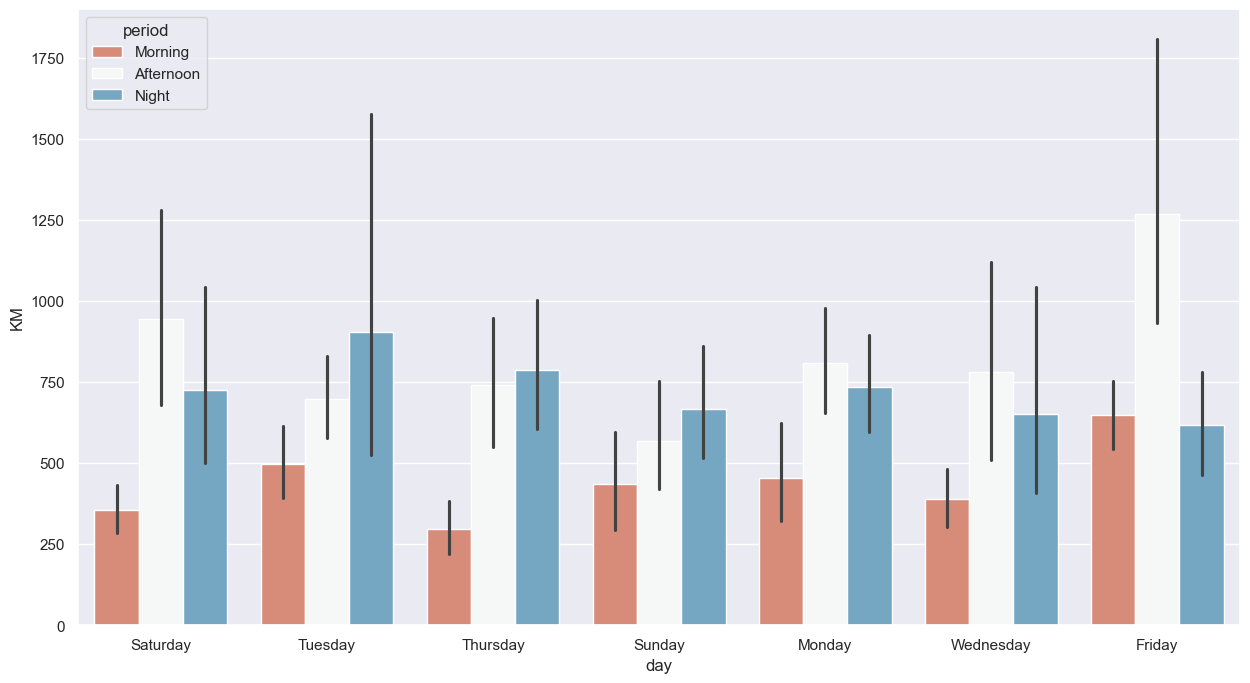

In [44]:
sns.barplot(data=df,x='day',y='KM',hue='period',palette='RdBu',estimator=sum)

<span style='color : red'>Thank You!</span>